In [1]:
# importing data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

titanic_df = pd.read_csv('titanic_data.csv')
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [265]:
# function to standardize data by keyword

def standardizing_df_data(df, *keywords):
    standardized_df = df.copy()
    
    def standardize_data(df, key_word):
        df1 = (df[key_word] - np.mean(df[key_word])) / np.std(df[key_word])
        return df1
    
    for keyword in keywords:
        standardized_df[keyword] = standardize_data(standardized_df, keyword)
    return standardized_df


standardized_all_titanic_df = standardizing_df_data(titanic_df, 'Age', 'Fare', 'Pclass', 'Survived', 'SibSp', 'Parch')
standardized_all_titanic_df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,-0.789272,0.827377,"Braund, Mr. Owen Harris",male,-0.530377,0.432793,-0.473674,A/5 21171,-0.502445,NaN,S


In [267]:
# function to standardize data by keyword(s)

def adding_standardized_data_df(df, *keywords):
    new_df = df.copy()
    
    def standardize_data(df, key_word):
        df1 = (df[key_word] - np.mean(df[key_word])) / np.std(df[key_word])
        return df1
    
    for keyword in keywords:
        new_df['Standardized ' + keyword] = standardize_data(new_df, keyword)
        
    return new_df


titanic_w_standardized_data_df = adding_standardized_data_df(titanic_df, 'Age', 'Fare', 'Pclass', 'Survived', 'SibSp', 'Parch')
titanic_w_standardized_data_df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Standardized Age,Standardized Fare,Standardized Pclass,Standardized Survived,Standardized SibSp,Standardized Parch
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,-0.530377,-0.502445,0.827377,-0.789272,0.432793,-0.473674


In [269]:
# Creating age groups

def add_age_groups(df):
    new_df = df.copy()
    
    def age_groups(age):
        if age == 'NaN' or age == None:
            return 'No Age Data'
        elif age <= 14.0:
            return 'Child'
        elif age <= 25.0:
            return 'Young Adult'
        elif age <= 50.0:
            return 'Adult'
        elif age > 50.0:
            return 'Elderly'
        
    new_df['Age Group'] = new_df['Age'].apply(age_groups)
    return new_df
    
titanic_age_groups_df = add_age_groups(titanic_df)
titanic_age_groups_df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,Young Adult


Populating the interactive namespace from numpy and matplotlib


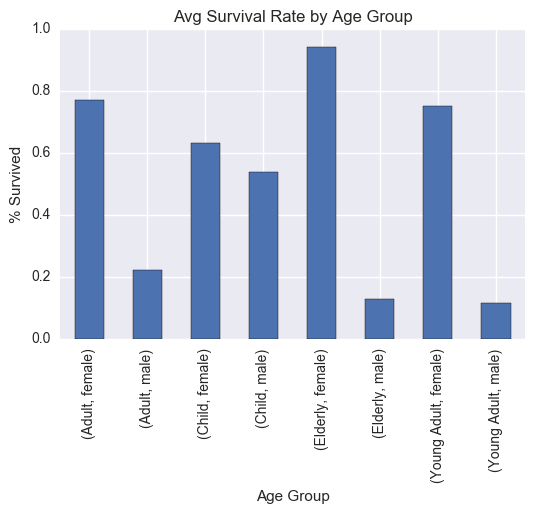

In [170]:
# charting survival rate vs. age group
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%pylab inline

age_group = titanic_age_groups_df.groupby(['Age Group', 'Sex'])

age_group_survival_plot = age_group['Survived'].mean().plot(x='Age Group', kind='bar', title = 'Avg Survival Rate by Age Group', legend = False)

age_group_survival_plot.set_xlabel('Age Group')
age_group_survival_plot.set_ylabel('% Survived')


Populating the interactive namespace from numpy and matplotlib


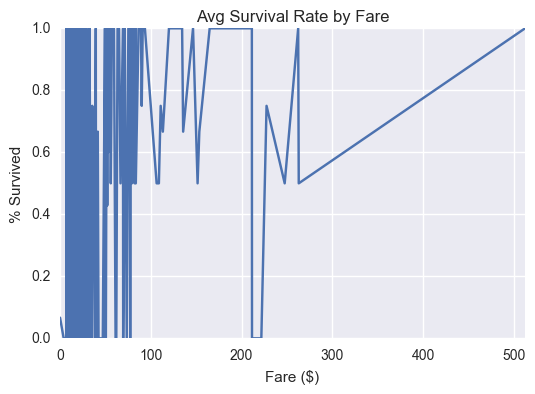

In [172]:
# charting survival rate vs. fare
%pylab inline

fare_group = titanic_age_groups_df.groupby('Fare')

fare_group_survival_plot = fare_group['Survived'].mean().plot(x='Fare', kind='line', title = 'Avg Survival Rate by Fare', legend = False)

fare_group_survival_plot.set_xlabel('Fare ($)')
fare_group_survival_plot.set_ylabel('% Survived')


Populating the interactive namespace from numpy and matplotlib


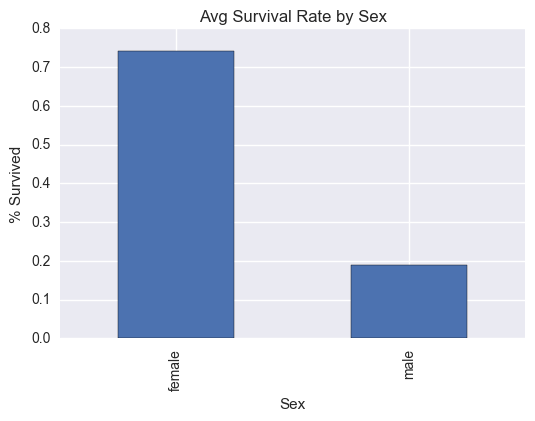

In [52]:
# male vs female survival
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%pylab inline

sex_group = titanic_df.groupby('Sex')

sex_survival_plot = sex_group['Survived'].mean().plot(x='Sex', kind='bar', title = 'Avg Survival Rate by Sex', legend = False)

sex_survival_plot.set_xlabel('Sex')
sex_survival_plot.set_ylabel('% Survived')




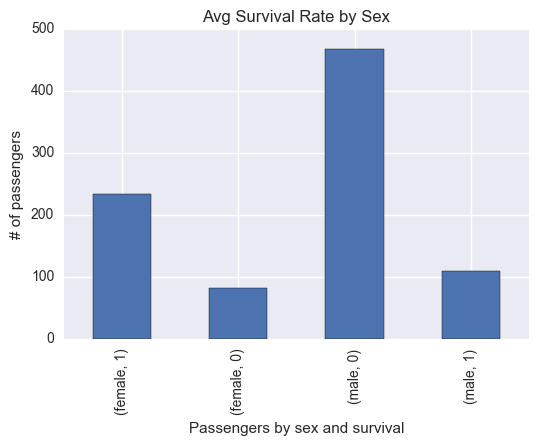

In [64]:
# total passengers by sex vs surviving passengers by sex

sex_group = titanic_df.groupby('Sex')

sex_survival_plot = sex_group['Survived'].value_counts().plot(x='Sex', kind='bar', title = 'Avg Survival Rate by Sex', legend = False)

sex_survival_plot.set_xlabel('Passengers by sex and survival')
sex_survival_plot.set_ylabel('# of passengers')



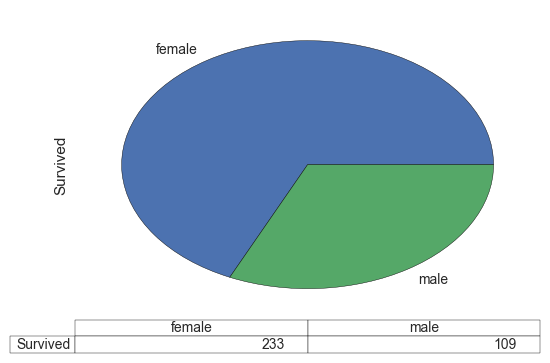

In [59]:
# male and female survival - pie chart

sex_survival_pie_chart = sex_group['Survived'].sum().plot.pie(table = True)

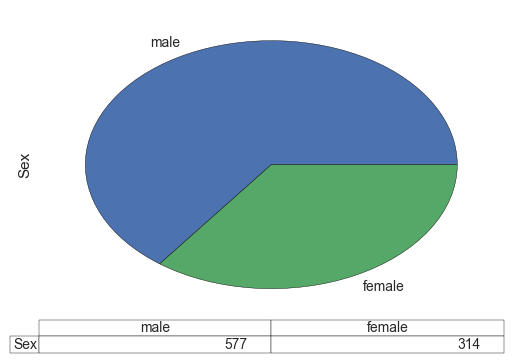

In [61]:
# total male and female passengers on board - pie chart

sex_total_passengers_pie_chart = titanic_df['Sex'].value_counts().plot.pie(subplots = True, table = True)

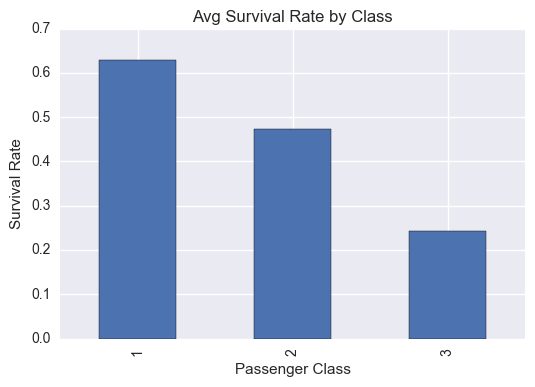

In [78]:
# Survival by class

class_group = titanic_df.groupby('Pclass')
        
class_survival_plot = class_group['Survived'].mean().plot(x='Pclass', kind='bar', title = 'Avg Survival Rate by Class', legend = False)

class_survival_plot.set_xlabel('Passenger Class')
class_survival_plot.set_ylabel('Survival Rate')